In [15]:
# Primeiro, vamos importar as bibliotecas necessárias e carregar a base de dados iris:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

In [16]:
# Agora vamos criar o modelo MLP. Vamos criar uma rede com uma camada oculta de 5 neurônios e 1000 épocas de treinamento:

mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=123)

In [17]:
# Em seguida, vamos criar o objeto "KFold" para o k fold cross validation com 5 pastas:

kf = KFold(n_splits=5, shuffle=True, random_state=123)

In [18]:
# Agora vamos treinar o modelo e guardar as informações do treinamento em uma lista "info_list".
# Vamos também criar uma lista "coef_list" para armazenar os pesos dos neurônios em cada pasta:

info_list = []
coef_list = []
loss_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    info = mlp.fit(X_train, y_train)
    info_list.append(info)
    coef_list.append(info.coefs_[0].T)
    loss_list.append(info.loss_curve_)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron

In [19]:
# Podemos calcular a média dos erros por época em cada pasta usando a função "np.mean".
# O código abaixo mostra como criar uma lista "mean_loss" que armazena a média dos erros por época em cada pasta:

mean_loss = np.mean(loss_list, axis=0)

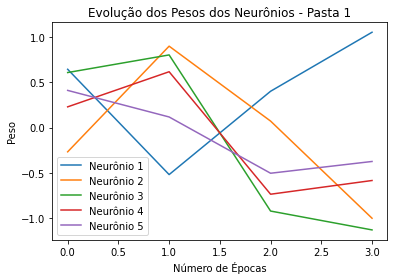

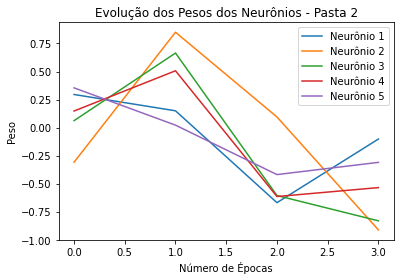

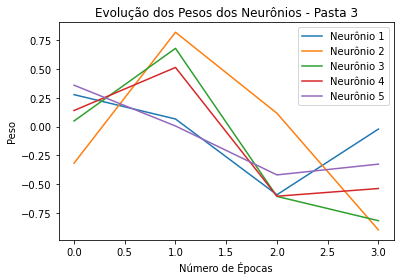

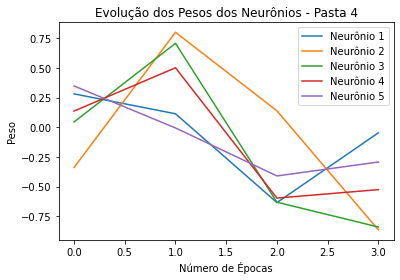

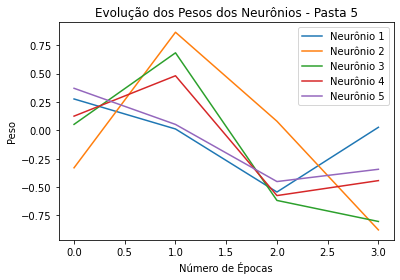

In [20]:
# Podemos visualizar a evolução dos pesos dos neurônios durante o treinamento para cada pasta usando a lista "coef_list".
# O código abaixo mostra um exemplo de como criar esse gráfico:

for i, coefs in enumerate(coef_list):
    for j, coef in enumerate(coefs):
        plt.plot(coef, label='Neurônio ' + str(j+1))
    plt.title('Evolução dos Pesos dos Neurônios - Pasta ' + str(i+1))
    plt.xlabel('Número de Épocas')
    plt.ylabel('Peso')
    plt.legend()
    plt.show()

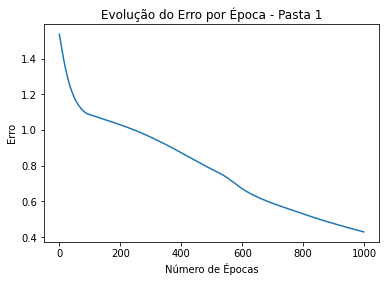

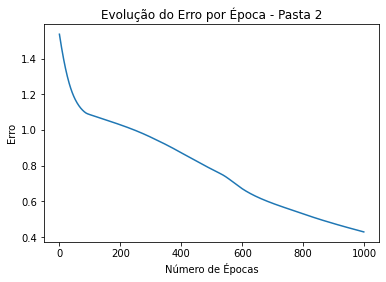

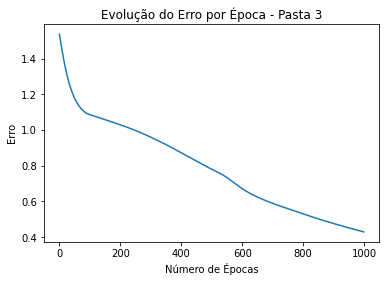

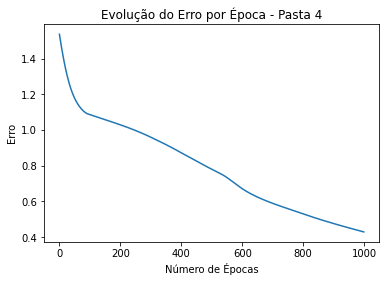

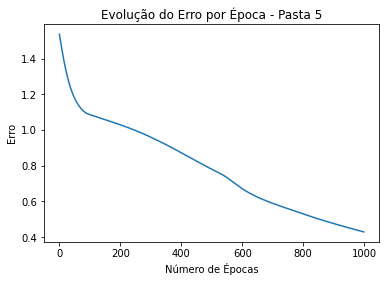

In [21]:
# Também podemos visualizar a evolução dos erros por época durante o treinamento para cada pasta usando o atributo "loss_curve_" da classe "MLPClassifier" em cada elemento da lista "info_list".
# O código abaixo mostra um exemplo de como criar esse gráfico:

for i, info in enumerate(info_list):
    plt.plot(info.loss_curve_)
    plt.title('Evolução do Erro por Época - Pasta ' + str(i+1))
    plt.xlabel('Número de Épocas')
    plt.ylabel('Erro')
    plt.show()

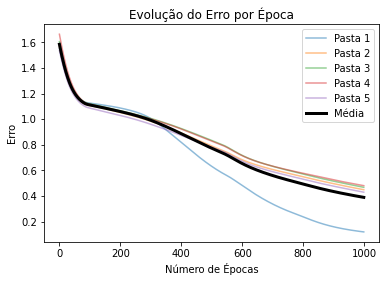

In [22]:
# Podemos visualizar a evolução dos erros por época durante o treinamento para cada pasta e a média dos erros por época
# em um só gráfico usando a lista "mean_loss". O código abaixo mostra um exemplo de como criar esse gráfico:

for i, loss in enumerate(loss_list):
    plt.plot(loss, alpha=0.5, label='Pasta ' + str(i+1))
plt.plot(mean_loss, linewidth=3, color='black', label='Média')
plt.title('Evolução do Erro por Época')
plt.xlabel('Número de Épocas')
plt.ylabel('Erro')
plt.legend()
plt.show()